## Set up

In [1]:
!nvidia-smi

Fri Dec 15 21:42:48 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
!pip install ultralytics

from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()
!yolo checks

Ultralytics YOLOv8.0.227 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.4/166.8 GB disk)

OS                  Linux-6.1.58+-x86_64-with-glibc2.35
Environment         Colab
Python              3.10.12
Install             pip
RAM                 12.67 GB
CPU                 Intel Xeon 2.20GHz
CUDA                12.1

matplotlib          ✅ 3.7.1>=3.3.0
numpy               ✅ 1.23.5>=1.22.2
opencv-python       ✅ 4.8.0.76>=4.6.0
pillow              ✅ 9.4.0>=7.1.2
pyyaml              ✅ 6.0.1>=5.3.1
requests            ✅ 2.31.0>=2.23.0
scipy               ✅ 1.11.4>=1.4.1
torch               ✅ 2.1.0+cu121>=1.8.0
torchvision         ✅ 0.16.0+cu121>=0.9.0
tqdm                ✅ 4.66.1>=4.64.0
pandas              ✅ 1.5.3>=1.1.4
seaborn             ✅ 0.12.2>=0.11.0
psutil              ✅ 5.9.5
py-cpuinfo          ✅ 9.0.0
thop                ✅ 0.1.1-2209072238>=0.1.1


## Import YOLO_V8 and train model on custom dataset

In [3]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="PNOLaWtQd9CO1PVSCXwe")
project = rf.workspace("thomas-royb3").project("facial_expressions_detection")
dataset = project.version(1).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.227, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to facial_expressions_detection-1 in yolov8:: 100%|██████████| 294/294 [00:00<00:00, 4025.13it/s]


In [6]:
# Training
!yolo task=detect mode=train model=yolov8m.pt data=/content/facial_expressions_detection-1/data.yaml epochs=20 imgsz=640

100% 49.7M/49.7M [00:00<00:00, 284MB/s]
Ultralytics YOLOv8.0.227 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/facial_expressions_detection-1/data.yaml, epochs=20, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, 

In [7]:
!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data=/content/facial_expressions_detection-1/data.yaml

Ultralytics YOLOv8.0.227 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25843234 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/facial_expressions_detection-1/valid/labels.cache... 28 images, 0 backgrounds, 0 corrupt: 100% 28/28 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 2/2 [00:02<00:00,  1.18s/it]
                   all         28         49      0.617      0.514      0.383      0.226
                 angry         28          1     0.0398          1      0.249      0.224
                 happy         28         25      0.677        0.6      0.638      0.319
               neutral         28         17        0.5      0.471       0.38      0.203
                   sad         28          4      0.868        0.5      0.515      0.307
             surprised         28          2          1          0      0.133     0.0798
Speed: 11.6ms preprocess, 28.0ms

In [16]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.90 source=/content/facial_expressions_detection-1/test/images

Ultralytics YOLOv8.0.227 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25843234 parameters, 0 gradients, 78.7 GFLOPs

image 1/14 /content/facial_expressions_detection-1/test/images/image11_jpg.rf.a6c6c51c4041757b2dac8778dc4338dc.jpg: 640x640 (no detections), 37.1ms
image 2/14 /content/facial_expressions_detection-1/test/images/image12_jpg.rf.7c39359cbc4fb57034c1f15661e1792c.jpg: 640x640 1 angry, 37.0ms
image 3/14 /content/facial_expressions_detection-1/test/images/image17_jpg.rf.6c5f626694ab87d9e37751debf547572.jpg: 640x640 (no detections), 37.1ms
image 4/14 /content/facial_expressions_detection-1/test/images/image1_jpg.rf.2fc9a047eb4e1b654b3e9af4c3a243c3.jpg: 640x640 (no detections), 37.1ms
image 5/14 /content/facial_expressions_detection-1/test/images/image20_jpg.rf.e1d43821a98e6fc4ad25fcdad8947ee6.jpg: 640x640 (no detections), 37.1ms
image 6/14 /content/facial_expressions_detection-1/test/images/image27_jpg.rf.b31204c926038e1454629

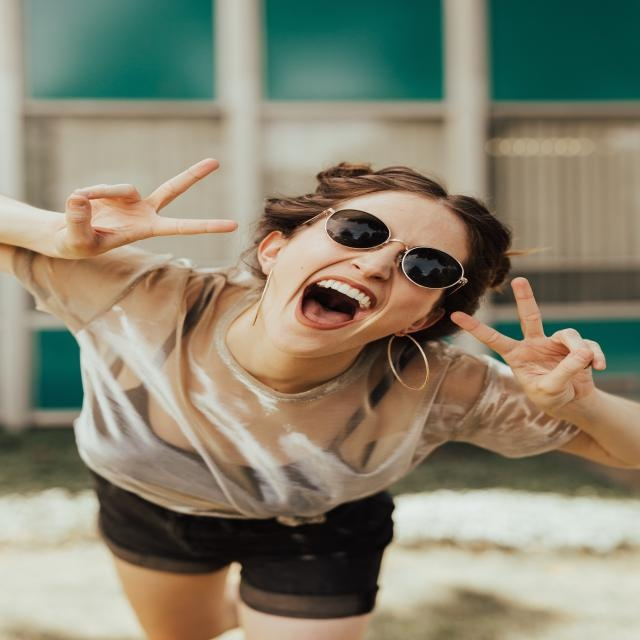

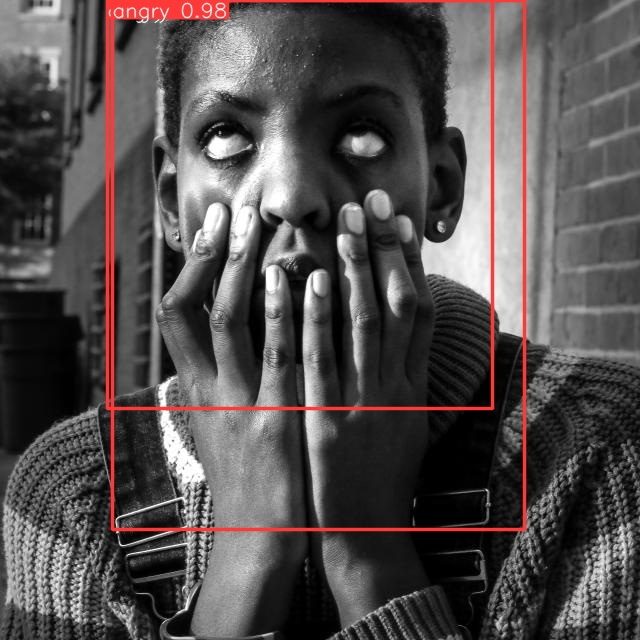

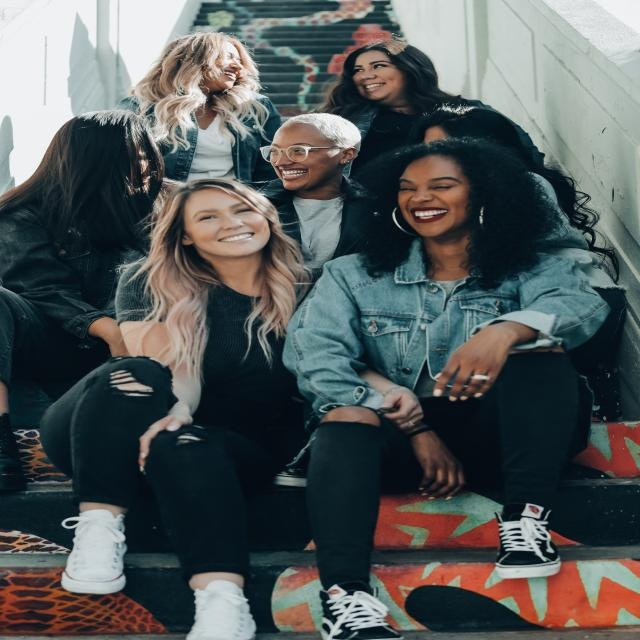

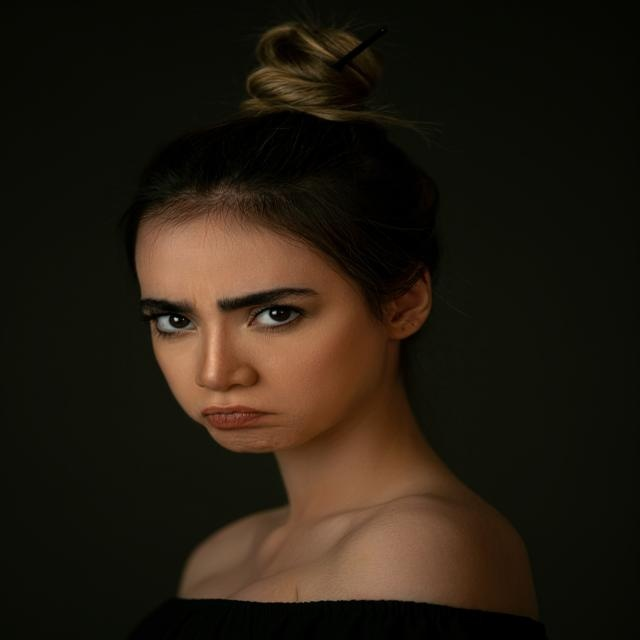

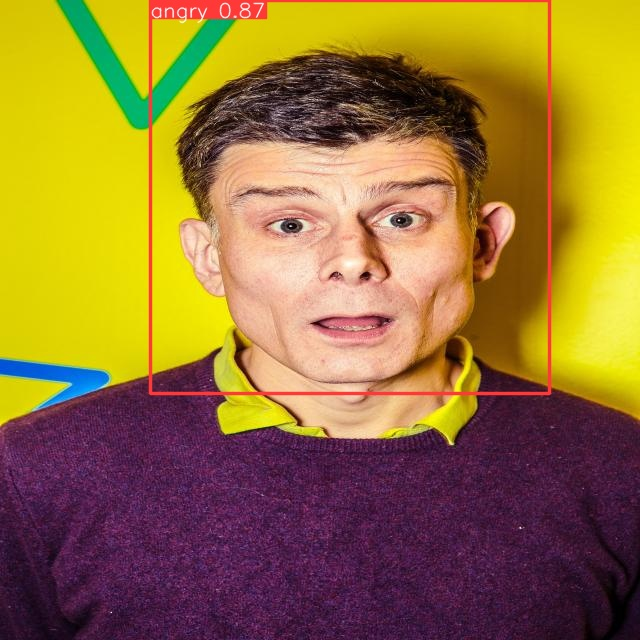

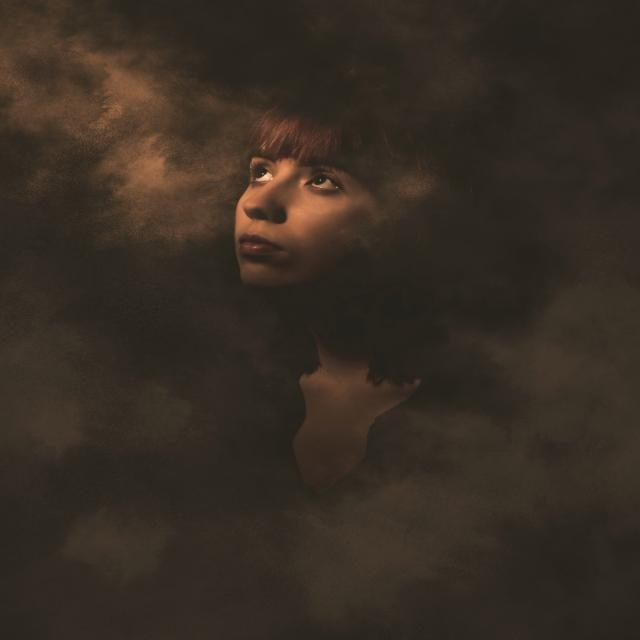

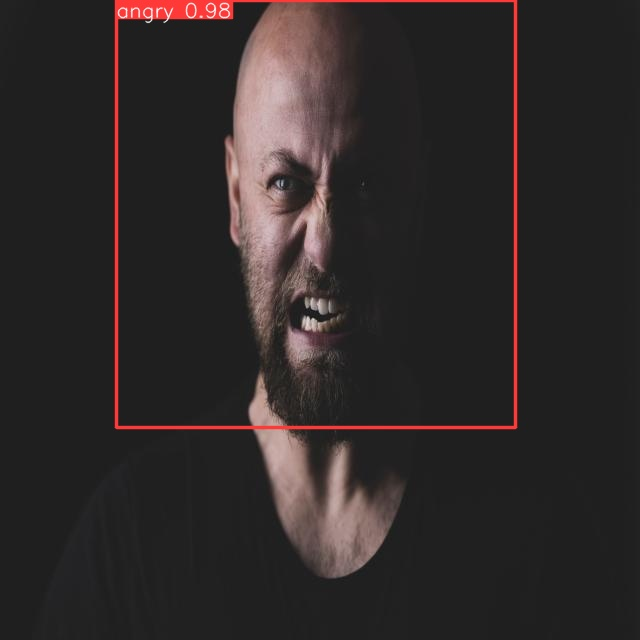

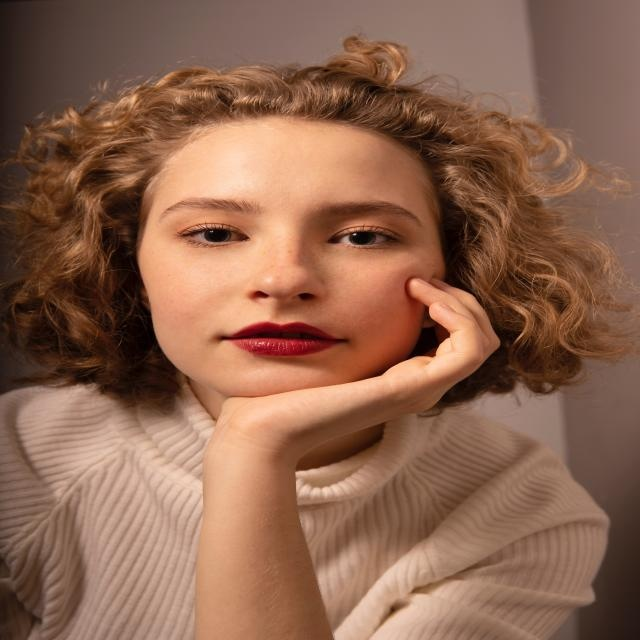

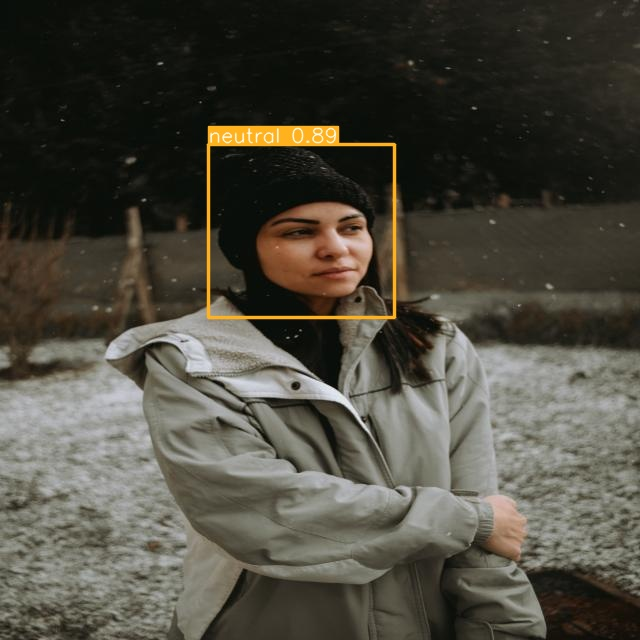

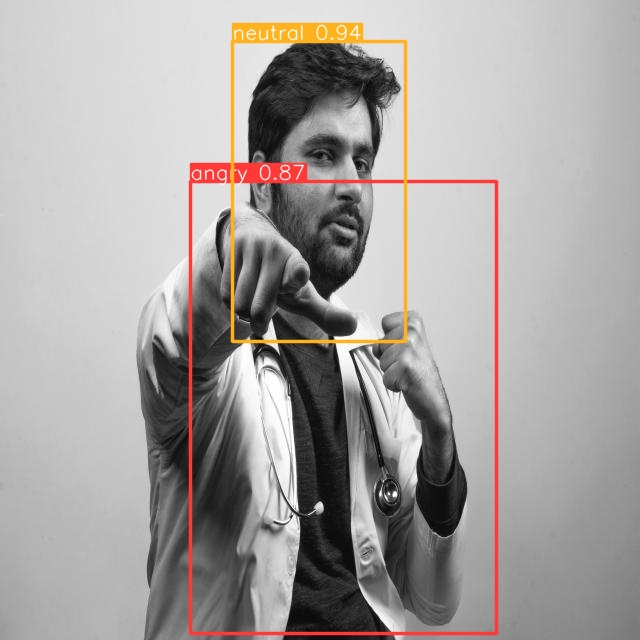

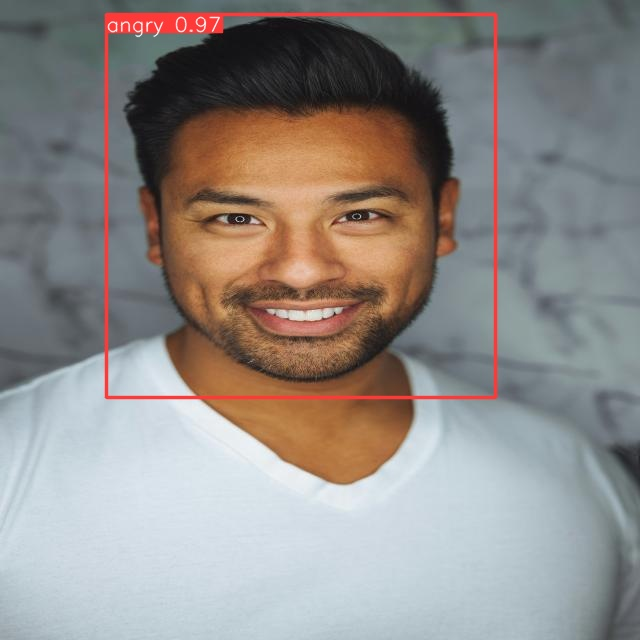

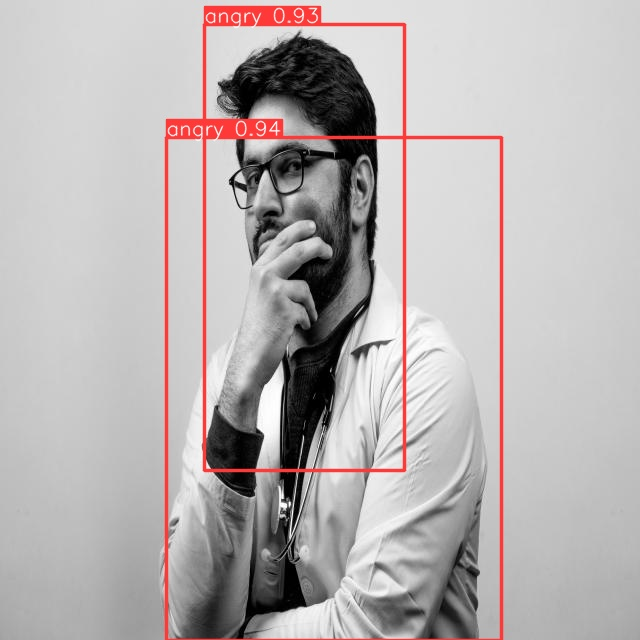

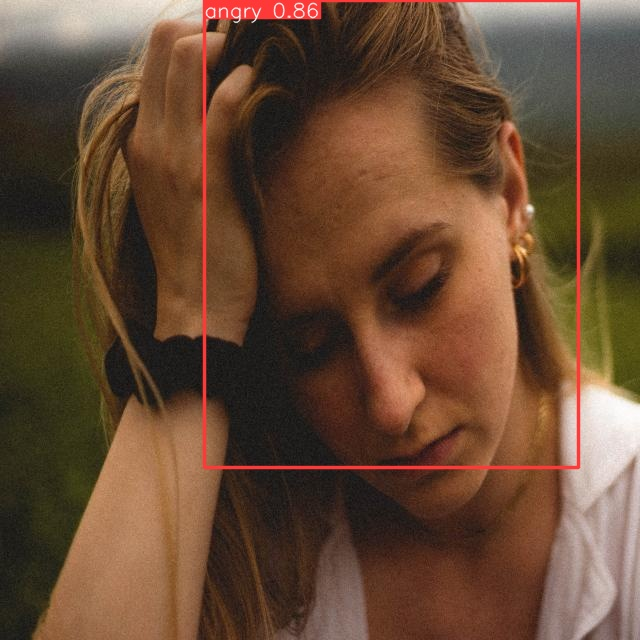

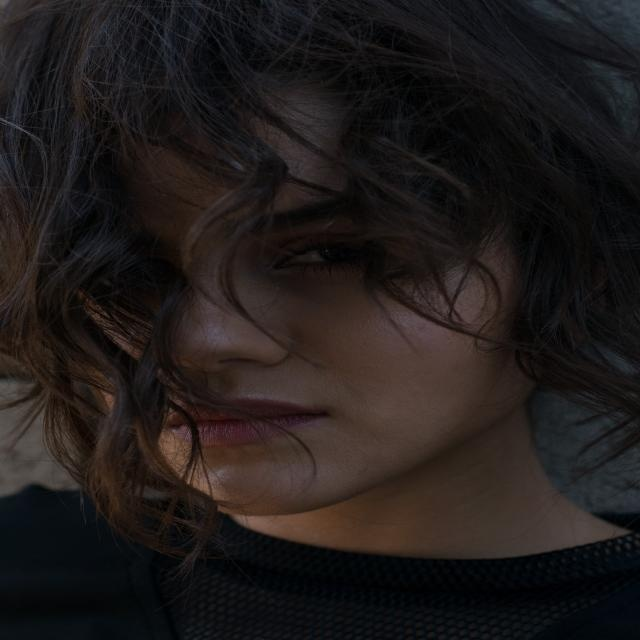

In [17]:
import glob
from IPython.display import Image, display

for i, image_path in enumerate(glob.glob(f'/content/runs/detect/predict/*.jpg')):
  if i >= 15:
    break
  display(Image(filename=image_path, height=600))